<a id='ToC'></a>

----------

# Table of contents
- [Introduction](#introduction)
- [Import libraries/packages](#import)
- [Data definition](#data-definition)
- [Data preparation](#data-preparation)
- [Loading datasets](#loading-datasets)
- [Simple visualisations based on](#simple-time-based-visualisations)
  - [Time-based fields](#simple-time-based-visualisations)
    - Pickup hour
    - Day period (morning, afternoon, etc...)
    - Day name (day of the week)
    - Weekday or weekend    
    - Month
    - Season
    - Pickup hour versus trip duration versus passenger count
- [Summary](#summary)
- [Conclusions](#conclusions)

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='introduction'></a>

----------
>
> ## Introduction
>
> ### As part of a case-study for an early-stage startup called "Wonders of New York" - a touring company, that targeted the New York City tourists and those looking to explore the hidden wonders in the city. We will be going through a few Exploratory Data Analysis steps using the popular New Year City Taxi Trip Duration dataset. The data scientists at the startup were given the task of finding out the most and least popular (or peak and off-peak periods) time to use the taxi. <i>Here period is not limited to just hours but any other type of period i.e day period, weekdays/weekends, months, seasons, etc</i>.
> 
> ### The stakeholders left them with this query and were looking for some insights from any data they could get their hands on. They wanted a simple and non-detailed answer so hey could make a quick decision about their future course of action. Their purpose was to find a niche in the market and see if they could get there before others did. And of course, the underlying goal is rotating around <i>profitability and market-share</i>.
>
> ### After some delibration, the data scientists came up with an analysis report (notebook) and shared it with the stakeholders.
>
> ### Let's go through the simple analysis and see what we have found.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='import'></a>

----------

## Import libraries/packages

In [3]:
# Import library and dataset
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML, display

sns.set(style="whitegrid", font_scale=1.5)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import warnings
warnings.filterwarnings("ignore")

import math

import missingno as msno

# prettify plots\n
plt.rcParams['figure.figsize'] = [18.0, 3.5]
    
%matplotlib inline

In [4]:
def plot_histogram(title: str = '<No title specified>', 
                   field_names=None, xlabel_title='<Not specified>', ylabel_title='<Not specified>', 
                   xticks_label_rotation: int = None,
                   sort_values: bool = None, bins=10, width: int = 20.0, height: int = 5.0,
                   orientation: str = "vertical"):
    plt.rcParams['figure.figsize'] = [width, height]
    if xticks_label_rotation:
        plt.xticks(rotation=xticks_label_rotation)
    plt.suptitle(title, fontsize="xx-large", fontstyle="normal")
    if sort_values:
        ax = train_text_combined[field_names].sort_values(ascending=sort_values).hist(bins=bins, orientation=orientation)
    else:
        ax = train_text_combined[field_names].hist(bins=bins, orientation=orientation)
    ax.set_xlabel(xlabel_title)
    ax.set_ylabel(ylabel_title)
    
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [5]:
def plot_value_counts(title: str = '<No title specified>', 
                      field_names=None, xlabel_title='<Not specified>', ylabel_title='<Not specified>',
                      kind='barh', value_filter_func=None,
                      width: int = 20.0, height: int = 5.0):
    plt.rcParams['figure.figsize'] = [width, height]
    value_counts_dropoff = train_text_combined[field_names].value_counts()
    value_counts_dropoff = value_counts_dropoff.sort_values(ascending=True)
    if value_filter_func: 
        cutoff_filter = value_filter_func(value_counts_dropoff)
        ax = value_counts_dropoff[cutoff_filter].plot(kind=kind, title=title)
    else:
        ax = value_counts_dropoff.plot(kind=kind, title=title)
    
    if orientation == 'horizontal':
        current_values = plt.gca().get_xticks()
        plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
    else:
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    
    ax.set_xlabel(xlabel_title)
    ax.set_ylabel(ylabel_title)

In [22]:
def plot_scatterplot(x_col_name: str, y_col_name: str, hue_size_col_name: str, dataset_filter,
                   title: str = '<No title specified>', xlabel_title='<Not specified>', ylabel_title='<Not specified>', 
                   xticks_label_rotation: int = None,
                   width: int = 20.0, height: int = 5.0):
    plt.rcParams['figure.figsize'] = [width, height]
    if xticks_label_rotation:
        plt.xticks(rotation=xticks_label_rotation)
    plt.suptitle(title, fontsize="xx-large", fontstyle="normal")
    
    if dataset_filter is None:
        ax = sns.scatterplot(data=train_text_combined, x=x_col_name, y=y_col_name, hue=hue_size_col_name, size=hue_size_col_name)
    else:
        ax = sns.scatterplot(data=train_text_combined[dataset_filter], x=x_col_name, y=y_col_name, hue=hue_size_col_name, size=hue_size_col_name)
    
    ax.set_xlabel(xlabel_title)
    ax.set_ylabel(ylabel_title)
    
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='data-definition'></a>

----------

## Data definition: data fields in the extended dataset

The extended dataset has the following fields:

<i>Original fields</i>

- `id` - a unique identifier for each trip
- `vendor_id` - a code indicating the provider associated with the trip record
- `pickup_datetime` - date and time when the meter was engaged
- `dropoff_datetime` - date and time when the meter was disengaged
- `passenger_count` - the number of passengers in the vehicle (driver entered value)
- `pickup_longitude` - the longitude where the meter was engaged
- `pickup_latitude` - the latitude where the meter was engaged
- `dropoff_longitude` - the longitude where the meter was disengaged
- `dropoff_latitude` - the latitude where the meter was disengaged
- `store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- `trip_duration` - duration of the trip in seconds

<i>Extended fields (additional fields to the above)</i>

- `pickup_district` - the name of the NY district corresponding to the latitude and longitude of the pickup location
- `pickup_neighbourhood` - the name of the NY neighbourhood corresponding to the latitude and longitude of the pickup location
- `dropoff_district` - the name of the NY district corresponding to the latitude and longitude of the dropoff location
- `dropoff_neighbourhood` - the name of the NY neighbourhood corresponding to the latitude and longitude of the dropoff location
- `pickup_geonumber` - latitude and longitude of the pickup location combined into a single number
- `dropoff_geonumber` - latitude and longitude of the dropoff location combined into a single number
- `pickup_hour` - the hour of the day when a pickup was made for a trip/ride
- `day_period` - the name of the period of the day i.e. morning, evening, etc.. based on the pickup date/time
- `day_name` - day name i.e. Monday, Tuesday, etc…
- `weekday_or_weekend` - if the day is a weekday or weekend based on the pickup date/time
- `regular_day_or_holiday` - if the day is a regular day or holiday based on the pickup date/time
- `month` - calendar month based on the pickup date/time
- `year` - calendar year based on the pickup date/time
- `season` - season based on the pickup date/time

You can find the full description of the [extended dataset here](https://www.kaggle.com/datasets/neomatrix369/nyc-taxi-trip-duration-extended?select=train_test_extended.csv).
    

The original datasets `train.csv` and `test.csv` contained these fields and [futher definitions can be found here](https://www.kaggle.com/c/nyc-taxi-trip-duration/data).

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='data-preparation'></a>

----------

## Data preparation

Details of the data cleaning, preparation and transformation processes can be found in a separate notebook (Kaggle Kernel) called [ChaiEDA: NYC Taxi Trip Duration (data-prep)](https://www.kaggle.com/code/neomatrix369/chaieda-nyc-taxi-trip-duration-data-prep). All the generated data from this process can be found on this <i>Kaggle Dataset</i> called [New York City Taxi Trip Duration Extended](https://www.kaggle.com/datasets/neomatrix369/nyc-taxi-trip-duration-extended).

The original columns/fields have been linked to a second dataset called `nyc_additional_info.csv` and a handful of columns have been dropped/renamed during the process.

All of this has helped in enriching the original dataset.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='loading-datasets'></a>

----------

## Loading datasets

In [7]:
%%time
train_text_combined = pd.read_csv('./data/train_test_extended.csv')
print('train_test_extended.csv dataset')
print("Column count:", len(train_text_combined.columns))

train_test_extended.csv dataset
Column count: 26
CPU times: user 4.17 s, sys: 505 ms, total: 4.68 s
Wall time: 4.74 s


In [8]:
%%time
print("\n~~~ Details about the combined dataset before dropping and transforming a number of fields:")
train_text_combined.info(memory_usage='deep') 
train_text_combined = train_text_combined.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude','pickup_latitude',
                                                       'dropoff_longitude', 'dropoff_latitude', 'pickup_geonumber', 'dropoff_geonumber'])
train_text_combined['store_and_fwd_flag'] = train_text_combined['store_and_fwd_flag'].astype('category')
train_text_combined['pickup_district'] = train_text_combined['pickup_district'].astype('category')
train_text_combined['pickup_neighbourhood'] = train_text_combined['pickup_neighbourhood'].astype('category')
train_text_combined['dropoff_district'] = train_text_combined['dropoff_district'].astype('category')
train_text_combined['dropoff_neighbourhood'] = train_text_combined['dropoff_neighbourhood'].astype('category')
train_text_combined['pickup_hour'] = train_text_combined['pickup_hour'].astype('category')
train_text_combined['day_period'] = train_text_combined['day_period'].astype('category')
train_text_combined['day_name'] = train_text_combined['day_name'].astype('category')
train_text_combined['year'] = train_text_combined['year'].astype('int16')
train_text_combined['month'] = train_text_combined['month'].astype('category')
train_text_combined['financial_quarter'] = 'Q' + train_text_combined['financial_quarter'].apply(str)
train_text_combined['financial_quarter'] = train_text_combined['financial_quarter'].astype('category')
train_text_combined['season'] = train_text_combined['season'].astype('category')
train_text_combined['weekday_or_weekend'] = train_text_combined['weekday_or_weekend'].astype('category')
train_text_combined['regular_day_or_holiday'] = train_text_combined['regular_day_or_holiday'].astype('category')

train_text_combined['pickup_dropoff_district'] = train_text_combined['pickup_district'].astype(str) + ' → ' + train_text_combined['dropoff_district'].astype(str)
train_text_combined['pickup_dropoff_district'] = train_text_combined['pickup_dropoff_district'].astype('category')

train_text_combined['pickup_dropoff_neighbourhood'] = train_text_combined['pickup_neighbourhood'].astype(str) \
           + " (" + train_text_combined['pickup_district'].astype(str) + ") → " \
           + train_text_combined['dropoff_neighbourhood'].astype(str) \
           + " (" + train_text_combined['dropoff_district'].astype(str) + ")"
train_text_combined['pickup_dropoff_neighbourhood'] = train_text_combined['pickup_dropoff_neighbourhood'].astype('category')
train_text_combined['trip_duration'] = train_text_combined['trip_duration'] / (60 * 60) # convert to hours

print("\n\n~~~ Details about the combined dataset after dropping and transforming a number of fields:")
train_text_combined.info(memory_usage='deep')


~~~ Details about the combined dataset before dropping and transforming a number of fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083778 entries, 0 to 2083777
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      object 
 1   vendor_id               int64  
 2   pickup_datetime         object 
 3   dropoff_datetime        object 
 4   passenger_count         int64  
 5   pickup_longitude        float64
 6   pickup_latitude         float64
 7   dropoff_longitude       float64
 8   dropoff_latitude        float64
 9   store_and_fwd_flag      object 
 10  trip_duration           float64
 11  pickup_district         object 
 12  pickup_neighbourhood    object 
 13  dropoff_district        object 
 14  dropoff_neighbourhood   object 
 15  pickup_geonumber        float64
 16  dropoff_geonumber       float64
 17  day_period              object 
 18  month                   object 
 19  year        

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">There is a massive drop in memory usage since we dropped and transformed a number of columns - from 2GB to 84.8MB, <b>almost 99.959% drop</b> to be precise. Converting strings into categorical variables does this change, including changing numeric fields into integers (where possible. Note changing numeric fields can result in loss of precision and sometimes accuracy of those values once converted - so care must be taken.

In [9]:
display(train_text_combined.head())
display(train_text_combined.tail())

vendor_id  passenger_count store_and_fwd_flag  trip_duration  \
0          2                1                  N       0.126389   
1          1                1                  N       0.184167   
2          2                1                  N       0.590000   
3          2                1                  N       0.119167   
4          2                1                  N       0.120833   

  pickup_district pickup_neighbourhood dropoff_district dropoff_neighbourhood  \
0        Brooklyn   Bedford-Stuyvesant        Manhattan                Harlem   
1       Manhattan              Chelsea         Brooklyn           South Slope   
2       Manhattan      Upper West Side        Manhattan           East Harlem   
3       Manhattan          East Harlem         Brooklyn    Bedford-Stuyvesant   
4        Brooklyn          South Slope        Manhattan           East Harlem   

     day_period    month  year     season weekday_or_weekend  \
0  2. Afternoon  03. Mar  2016  2. Spring            Weekday   
1      4. Night  06. Jun  2016  3. Summer            Weekend   
2    1. Morning  01. Jan  2016  1. Winter            Weekday   
3    3. Evening  04. Apr  2016  2. Spring            Weekday   
4  2. Afternoon  03. Mar  2016  2. Spring            Weekend   

  regular_day_or_holiday pickup_hour      day_name financial_quarter  \
0            Regular day          17     1. Monday                Q4   
1            Regular day           0     7. Sunday                Q1   
2            Regular day          11    2. Tuesday                Q4   
3            Regular day          19  3. Wednesday                Q1   
4            Regular day          13   6. Saturday                Q4   

  pickup_dropoff_district                       pickup_dropoff_neighbourhood  
0    Brooklyn → Manhattan  Bedford-Stuyvesant (Brooklyn) → Harlem (Manhat...  
1    Manhattan → Brooklyn       Chelsea (Manhattan) → South Slope (Brooklyn)  
2   Manhattan → Manhattan  Upper West Side (Manhattan) → East Harlem (Man...  
3    Manhattan → Brooklyn  East Harlem (Manhattan) → Bedford-Stuyvesant (...  
4    Brooklyn → Manhattan   South Slope (Brooklyn) → East Harlem (Manhattan)

vendor_id  passenger_count store_and_fwd_flag  trip_duration  \
2083773          1                1                  N            NaN   
2083774          1                1                  N            NaN   
2083775          1                2                  N            NaN   
2083776          1                1                  N            NaN   
2083777          2                2                  N            NaN   

        pickup_district pickup_neighbourhood dropoff_district  \
2083773       Manhattan         West Village         Brooklyn   
2083774       Manhattan               Harlem         Brooklyn   
2083775       Manhattan               Harlem         Brooklyn   
2083776   Staten Island              Clifton    Staten Island   
2083777        Brooklyn         Clinton Hill        Manhattan   

        dropoff_neighbourhood day_period    month  year     season  \
2083773           Fort Greene   4. Night  01. Jan  2016  1. Winter   
2083774    Bedford-Stuyvesant   4. Night  01. Jan  2016  1. Winter   
2083775            Kensington   4. Night  01. Jan  2016  1. Winter   
2083776           Great Kills   4. Night  01. Jan  2016  1. Winter   
2083777                Harlem   4. Night  01. Jan  2016  1. Winter   

        weekday_or_weekend regular_day_or_holiday pickup_hour   day_name  \
2083773            Weekday  Holiday (or Festival)           0  5. Friday   
2083774            Weekday  Holiday (or Festival)           0  5. Friday   
2083775            Weekday  Holiday (or Festival)           0  5. Friday   
2083776            Weekday  Holiday (or Festival)           0  5. Friday   
2083777            Weekday  Holiday (or Festival)           0  5. Friday   

        financial_quarter        pickup_dropoff_district  \
2083773                Q4           Manhattan → Brooklyn   
2083774                Q4           Manhattan → Brooklyn   
2083775                Q4           Manhattan → Brooklyn   
2083776                Q4  Staten Island → Staten Island   
2083777                Q4           Brooklyn → Manhattan   

                              pickup_dropoff_neighbourhood  
2083773  West Village (Manhattan) → Fort Greene (Brooklyn)  
2083774  Harlem (Manhattan) → Bedford-Stuyvesant (Brook...  
2083775         Harlem (Manhattan) → Kensington (Brooklyn)  
2083776  Clifton (Staten Island) → Great Kills (Staten ...  
2083777       Clinton Hill (Brooklyn) → Harlem (Manhattan)

### Additional info dataset

Additional New York related location details from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data dataset.

##### Names of the fields and description

- `name`: name of the locality or building complex or area within a neighbourhood in a district
- `district`: next smallest administrative area inside the city (aka neighbour_hood group)
- `neighbourhood`: a smaller subset of the district
- `latitude`: the geographic latitude coordinate of the location of the district/neighbourhood or smaller subset
- `longitude`: the geographic longitude coordinate of the location of the district/neighbourhood or smaller subset

In [10]:
nyc_additional_info_df = pd.read_csv('./data/nyc_additional_info.csv')
nyc_additional_info_df.info(memory_usage='deep') 
nyc_additional_info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           48895 non-null  object 
 1   district       48895 non-null  object 
 2   neighbourhood  48895 non-null  object 
 3   latitude       48895 non-null  float64
 4   longitude      48895 non-null  float64
 5   geonumber      48895 non-null  float64
dtypes: float64(3), object(3)
memory usage: 11.8 MB


name       district  \
0                    Beautiful Well Kept Private Home!  Staten Island   
1                                       Cozy Apartment  Staten Island   
2                       Villa Digioia Visit Nyc Via Si  Staten Island   
3      Beautiful 4Br/4Ba Home, Staten Island, Ny City.  Staten Island   
4                                         Cozy Getaway  Staten Island   
...                                                ...            ...   
48890                   Private Studio In Private Home          Bronx   
48891        Nice House Room 2 Near Van Cortlandt Park          Bronx   
48892       Fantastic Sunny Peaceful Room In Riverdale          Bronx   
48893                          Nice House Private Room          Bronx   
48894                              Nice Room To Rent 1          Bronx   

         neighbourhood  latitude  longitude    geonumber  
0          Tottenville  40.49979  -74.24084  23415.72136  
1          Tottenville  40.50641  -74.23059  23416.92321  
2          Tottenville  40.50708  -74.24285  23417.03155  
3          Tottenville  40.50868  -74.23986  23417.32254  
4          Tottenville  40.50873  -74.23914  23417.33226  
...                ...       ...        ...          ...  
48890  North Riverdale  40.90804  -73.90005  23489.54715  
48891  North Riverdale  40.91167  -73.89566  23490.20494  
48892  North Riverdale  40.91169  -73.90564  23490.19856  
48893  North Riverdale  40.91234  -73.89417  23490.32703  
48894  North Riverdale  40.91306  -73.89389  23490.45691  

[48895 rows x 6 columns]

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

### Missing data information

We can take a quick look at the missing data information in the combined dataset.

<AxesSubplot:>

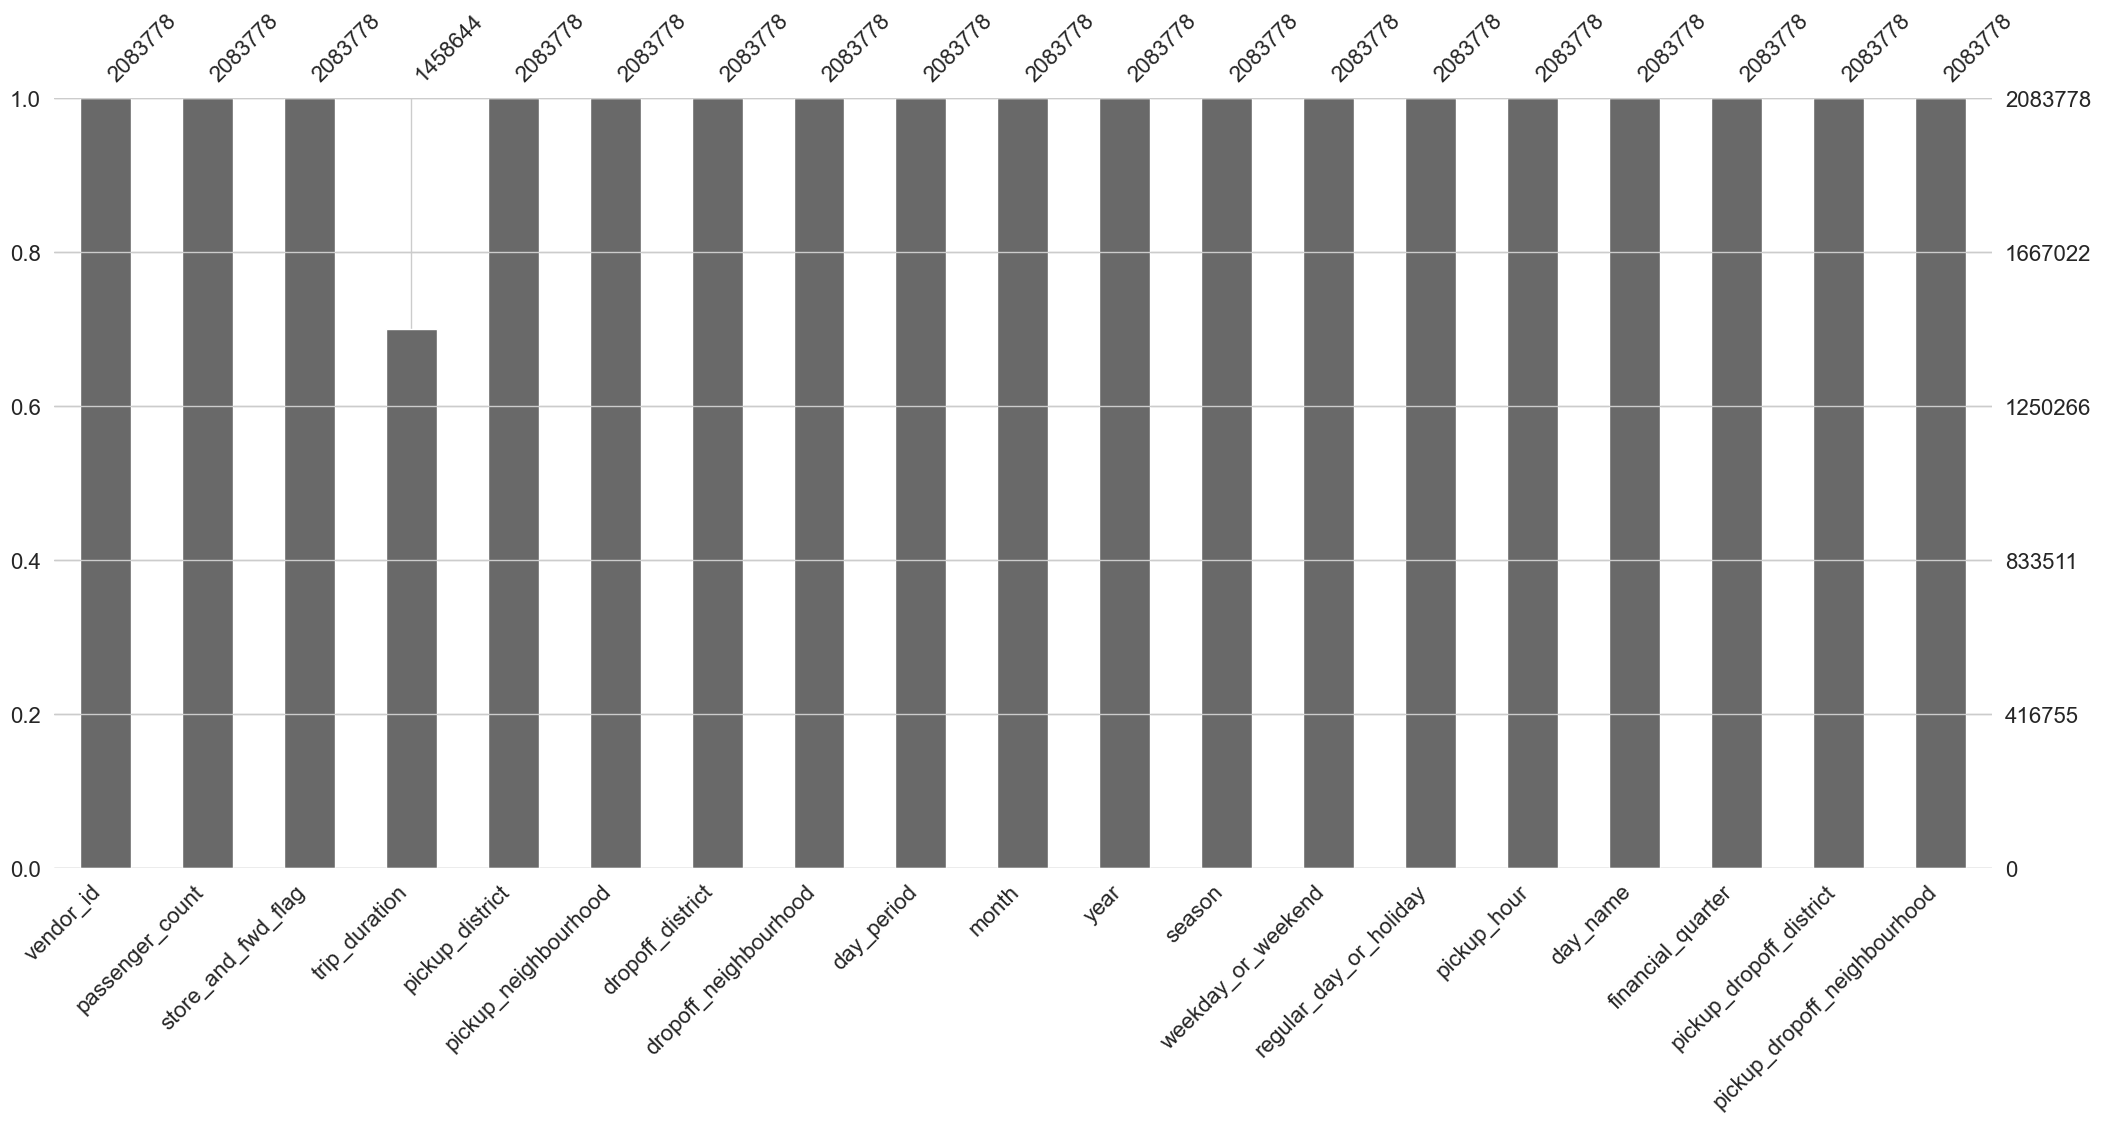

In [11]:
msno.bar(train_text_combined)

<i><p style="font-size:18px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">We can see that most of the columns are populated except for a number of entries with missing trip duration information, it appears nearly <b>25-30%</b> of the entries have this data missing. 

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='simple-time-based-visualisations'></a>

----------

## Simple visualisations based on Time-based fields

### Pickup hour

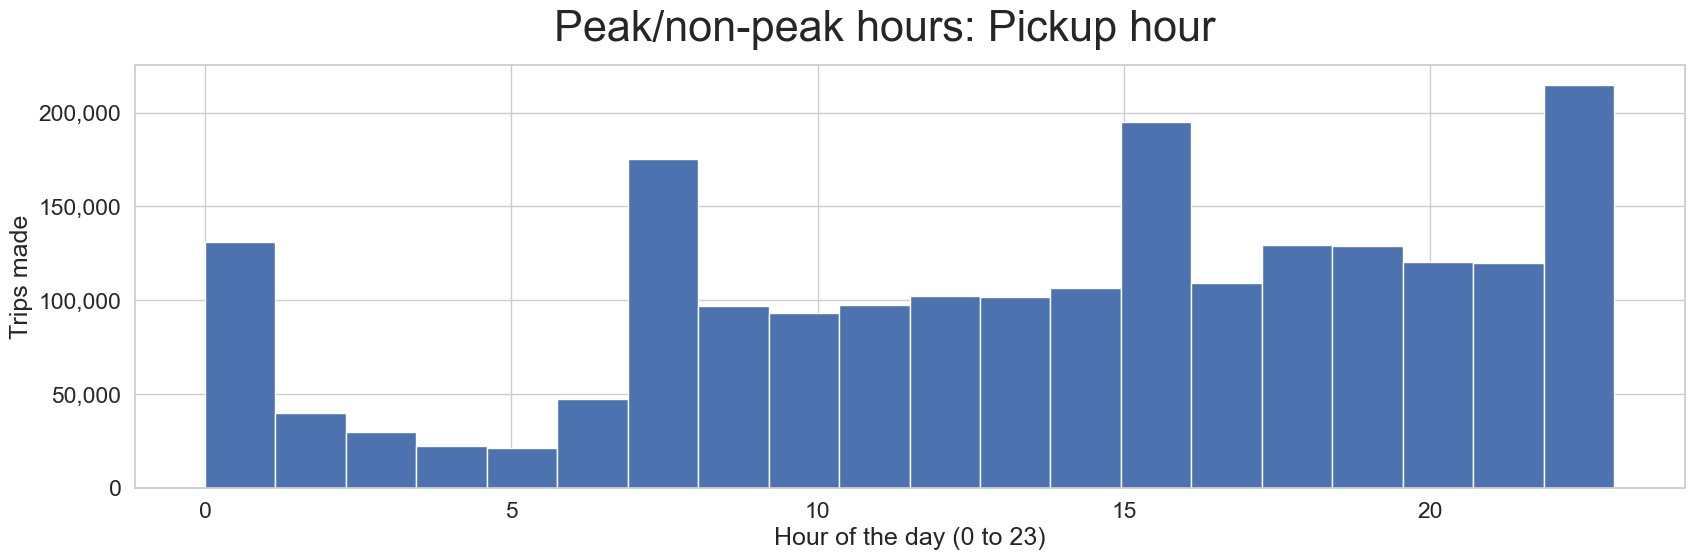

In [12]:
plot_histogram("Peak/non-peak hours: Pickup hour", 'pickup_hour', 
               ylabel_title='Trips made', xlabel_title='Hour of the day (0 to 23)',
               bins=20, height=5.5)

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">It's clear there is some cycle of pattern of usage, the most busy being the morning to night hours while <b>mid-night and later is least used till 5/6am in the morning</b> when it starts to pick up again.

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">The less busy or non-peak hours can be spotted and considered.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

### Day period

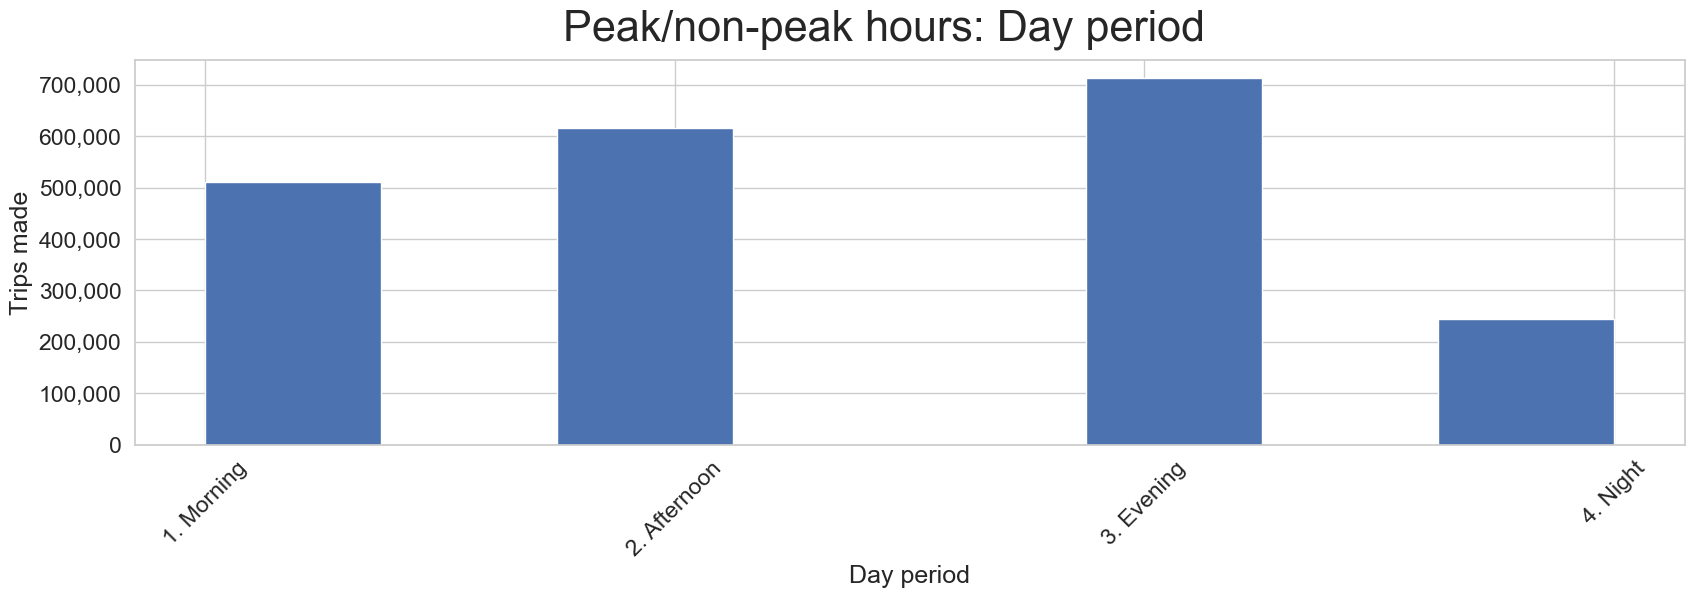

In [13]:
plot_histogram("Peak/non-peak hours: Day period", 'day_period', 
               ylabel_title='Trips made', xlabel_title='Day period',
               sort_values=True, xticks_label_rotation=45, 
               bins=8, height=5)

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">We already saw this trend from the above graph, the day time into the late hours of the evening is the most used hours, interestingly it drops at night. The evening usage could be for various reasons i.e. returning home, shopping, going out, etc... Hence it is worth finding out the various reasons for the usage across the day.

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;"> Just to understand the meaning of the various day periods, here is a breakdown: **Morning**: 6AM  to 11:59 Noon, **Afternoon**: 12 noon to 5.59PM, 
**Evening/Night**: 6PM to 12 Midnight (with activity), **Night/Sleep time**: 12 Midnight to 5:59AM (without activity).
    
<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">The less busy or non-peak periods in the day can be spotted and considered.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

### Day name (day of the week)

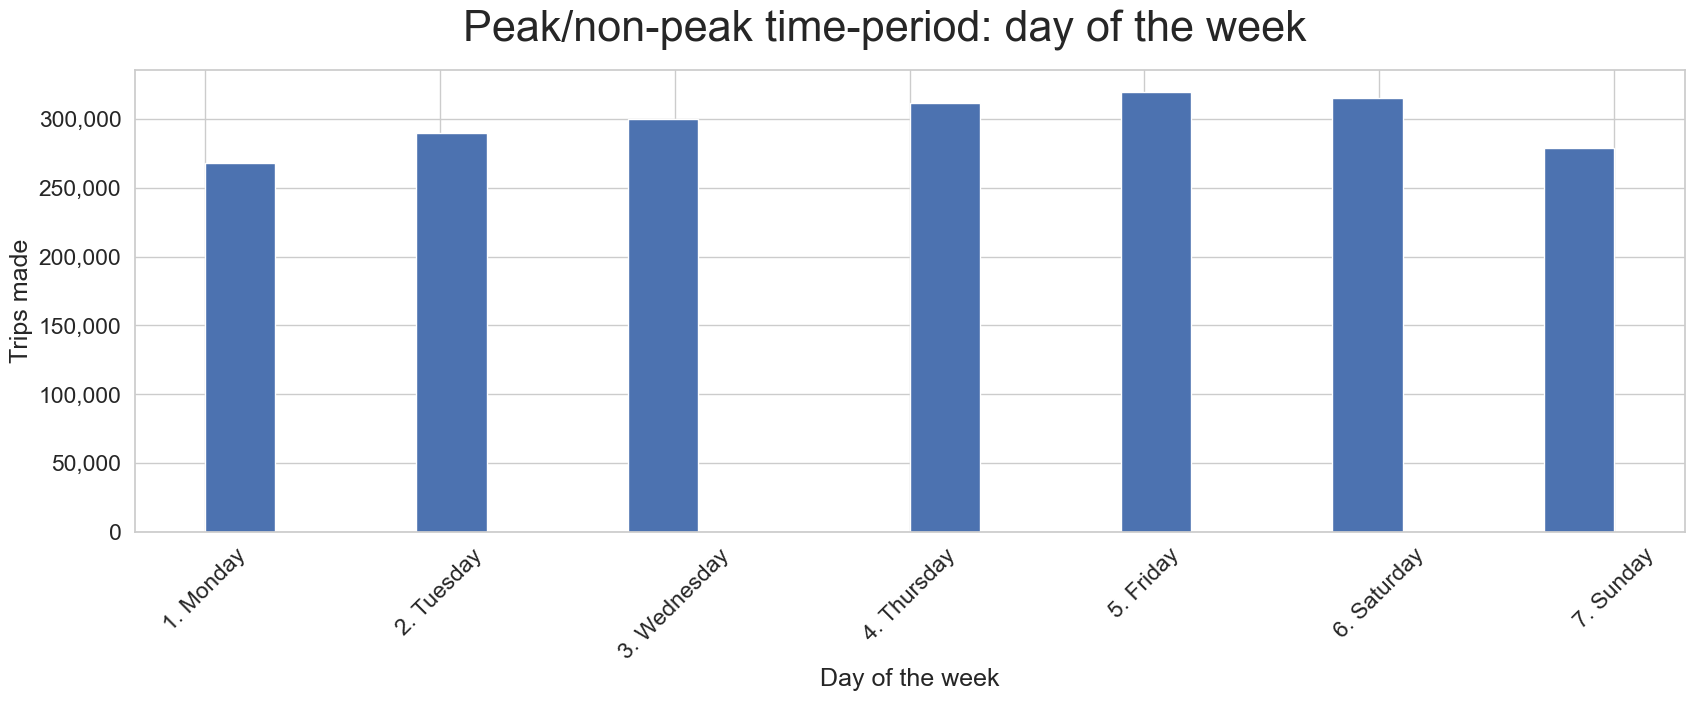

In [14]:
plot_histogram("Peak/non-peak time-period: day of the week", 'day_name', 
               ylabel_title='Trips made', xlabel_title='Day of the week',
               xticks_label_rotation=45, sort_values=True,
               bins=20, height=6.0)

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">Again here we see some sort of a cycle, **Thursday** and **Friday** seem to be busier than **Saturday** and **Sunday**. Also we can see a slow rise from **Monday** all the way into **Friday** and then a slow decline into **Saturday**, **Sunday** and **Monday**.
    
<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">The less busy or non-peak days can be spotted and considered.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

### Weekday or weekend

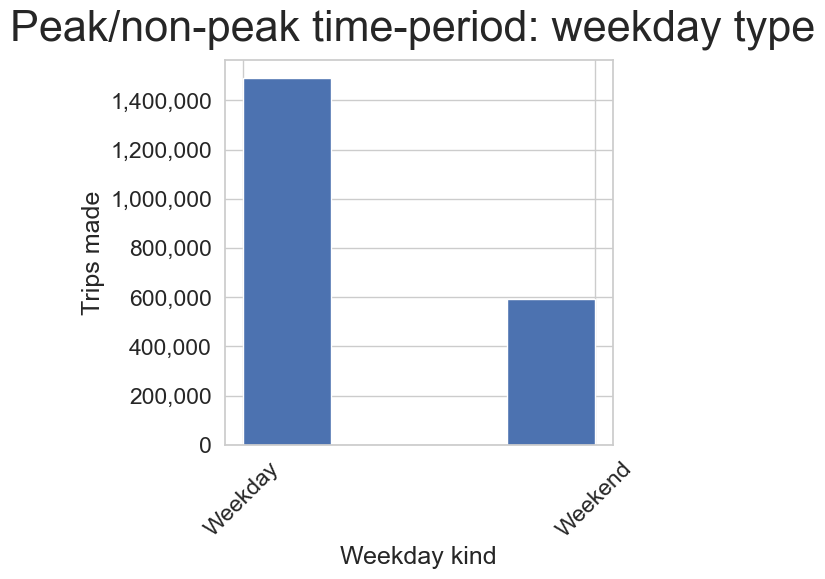

In [15]:
plot_histogram("Peak/non-peak time-period: weekday type", 'weekday_or_weekend', 
               ylabel_title='Trips made', xlabel_title='Weekday kind',
               xticks_label_rotation=45,
               bins=4, width=5.0, height=5)

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">Clearly <b>Weekdays</b> are <i>busier</i> than <b>Weekends</b> by a factor of <b>2x</b>. Obviously people are at home and do not come to the city unless it's for shopping purposes but most of the working people are either at home or not using taxis when going out, during weekends.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

### Month

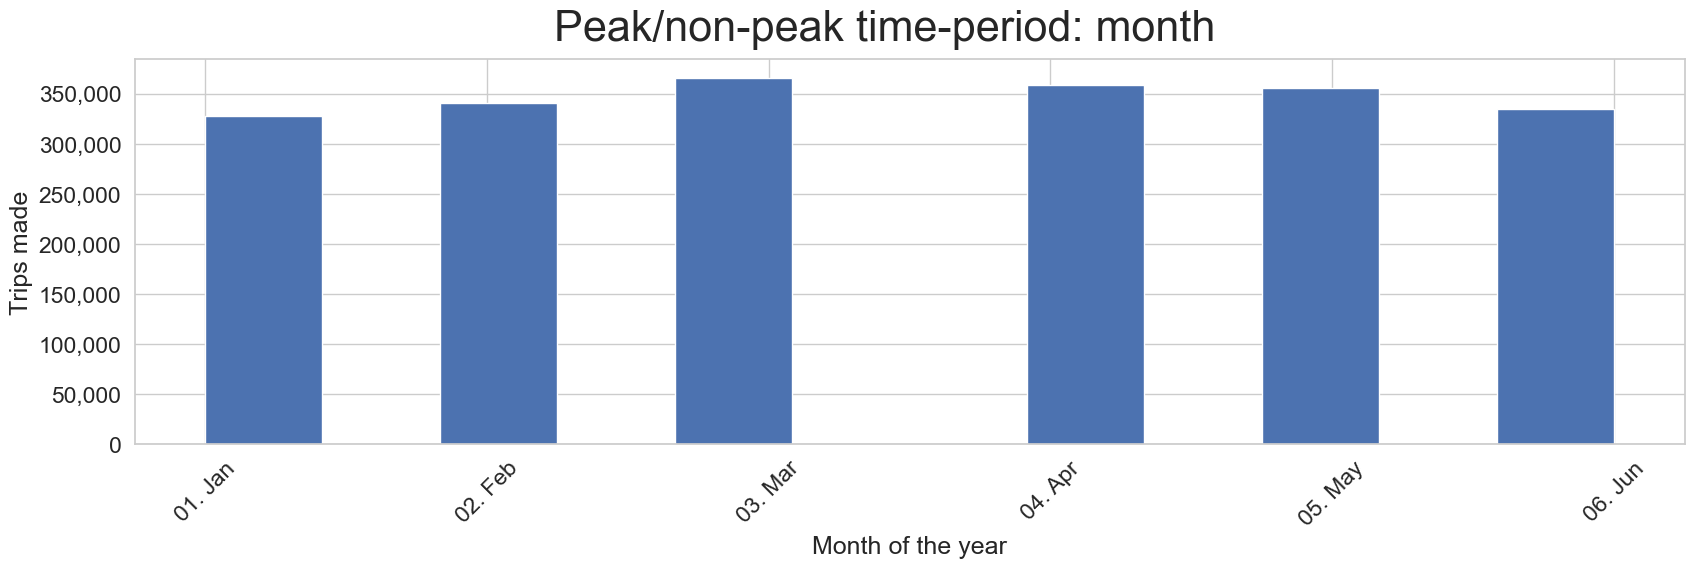

In [16]:
plot_histogram("Peak/non-peak time-period: month", 'month', 
               ylabel_title='Trips made', xlabel_title='Month of the year',               
               xticks_label_rotation=45, sort_values=True,
               bins=12, height=5.0)

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">We only have six months worth of data, but March was the busiest month among them, rising from <b>January into March and then slowly tappering down towards June</b>.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

### Season

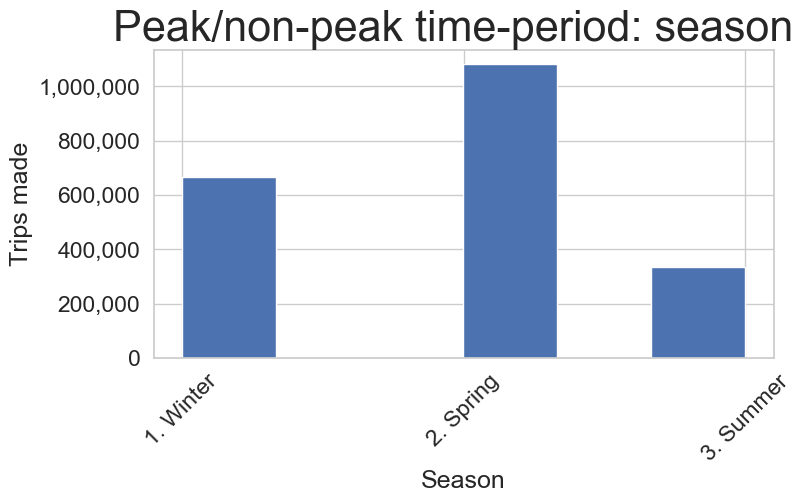

In [26]:
plot_histogram("Peak/non-peak time-period: season", 'season', 
               ylabel_title='Trips made', xlabel_title='Season',
               xticks_label_rotation=45, sort_values=True,
               bins=6, width=8, height=4)

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">As we have <b>no data for Fall (or Autumn)</b>, we can't conclude much but it appears that <b>Spring is the most popular time</b> of the three seasons, <b>Summer being the least and Winter being a half way between them</b>. It's possible that people are on vacation during the Summer and maybe tourists seldom use Taxis leading to much less usage. Possible the taxi drivers themselves are on vacation leading to less rides and less data collected about the activities.

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">The less busy or non-peak seasons can be spotted and considered.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

### Pickup hour versus trip duration versus passenger count

CPU times: user 1.65 s, sys: 74.5 ms, total: 1.72 s
Wall time: 1.19 s


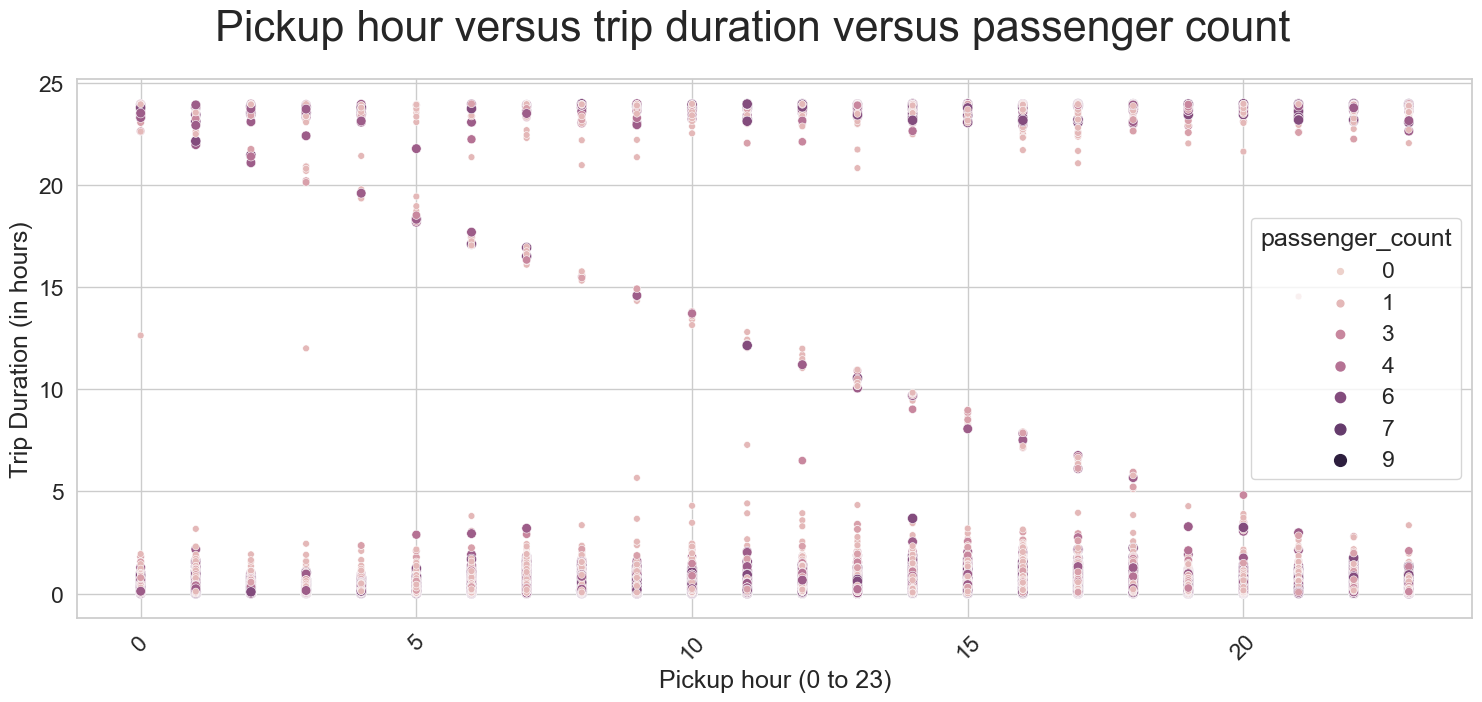

In [25]:
%%time
remove_outliers = train_text_combined['trip_duration'] < (1_000_000 / (60 * 60))

plot_scatterplot('pickup_hour', 'trip_duration', 'passenger_count', remove_outliers,
                 "Pickup hour versus trip duration versus passenger count", 
                 ylabel_title='Trip Duration (in hours)', xlabel_title='Pickup hour (0 to 23)',
                 xticks_label_rotation=45, width=18, height=7)

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">
We can see there is something not right about the way the visualisation looks, shows that there might be something in the underlying data, the diagornal pattern is too good to be true. We are only considering trip durations under 25 hours. The others are outliers and occur very rarely. <br><br>The other aspects of the data data shows a depending on the hour of the day (towards the middle of the day), the distances travelled increases).

<i><p style="font-size:20px; background-color: #FFF1D7; border: 2px solid black; margin: 20px; padding: 20px;">This insight <b>may not</b> be as valuable/useful to help with the original question(s) from the stakeholders.

<a id='summary'></a>

----------
>
> ## Summary
>
> - the dataset provided has very low missing values although observations provided cover only two vendors (two taxi companies) and also the data provided is across a single year and only six months of the year (fall or autumn data is missing)
> - Analysis using time-based data features from the data-points:
>   - Apart for a 4-5 hours late at night into the wee-hours of the morning, taxis are in demand throughout the 24 hour period
>   - If we observe closer, specifically speaking only during the evening times there is a drop in the demand for taxis, rest of the day and night times there is a continuous use of taxis in the city
>   - There is rise/fall pattern of usage during the week, drops on **Saturday**, **Sunday**, and **Monday** and then gradually rises from **Tuesday** to **Friday** and back to the same cycle
>   - From a monthly perspective (limited to six months only) - we can see a slow rise from **January** to **March** and then slow decline from **March** into **June**
>   - From a seasonal point of view (limited to three seasons only, missing Fall data, we see a high usage in **Spring** and **Winter** and a relatively low usage during the **Summer**
>   - **Weekdays** usage exceeds **Weekend** usage by a factor of 2x
>   - No year-on-year analysis is possible as we have data limited to one year only i.e. 2016

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='conclusions'></a>

----------

## Conclusions

#### So what are our conclusions, from the exploratory data analysis perspective(s).

> We could dive deeper into the time-based fields and gone further with Day, Week number, Quarter, Half-yearly, etc like analysis (other duration-based analysis).
> There are also opportunities to walk through the location-based analysis (distances, etc...).
> The real insights are hidden in the time-based cross location-based analysis, giving us a deep-dive into the multple dimensions the dataset has to offer to us.
> In addition to the 2D visualisations, we could express many of the insights using 3D and colour/shape coded 3D visualisations.
> As it's a location-based time-series dataset things like animations and/or map-based animations are also possible.


#### And also, do we think the stakeholders had enough information to make an informed decision. 

> <b>Of all the insights in the above section, two of the insights illustrated might be useful to answer the stakeholder questions, namely: </b>
> - <b>graph showing activities across seasons like summer, winter and spring</b>
> - <b>graph showing weekday versus weekend activities</b>
> - there might be some use coming out of the pickup hours versus trips and day period versus trips, but these appear a bit too granular

> As we do not know the what might have happened next, but we can guess one of these courses of action were taken:
> - further analysis of the dataset(s) were requested, exploring other available angles
> - steps were taken using the report, although it might have been on trial basis to validate and verify their hypothesis
> - no further analysis were requested for the time being and the stakeholders were exploring options

From everything we have seen so far, it seems there is a lot more to this than meets the eye. In the interest of time and to keep this case-study simple we have omitted and skipped over a lot of aspects and details. All of this leaves room for lots of opportunities to answer more questions and further with the <b>exploratory data analysis</b>.


<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>